In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [12]:
house_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')


In [13]:
house_data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
6,1127.886,11,12,4,2,2,148000
7,1352.040,5,7,3,2,1,58000
8,757.854,5,14,1,0,1,48000
9,1152.792,10,12,3,2,2,45000
10,1423.200,4,5,4,2,2,65000


In [14]:
house_data.rename(columns={'Living.Room':'Livingroom'}, inplace=True)

In [15]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [16]:
# assign dependent and independent / explanatory variables
variables = list(house_data.columns)
y = 'Price'
x = [var for var in variables if var not in y ]

In [46]:
import statsmodels.api as sm

# Ordinary least squares regression
model_Simple = sm.OLS(house_data[y], house_data[x]).fit()

# Add a constant term like so:
model = sm.OLS(house_data[y], sm.add_constant(house_data[x])).fit()


print(model_Simple.summary())

print('########################################')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1330.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:43:13   Log-Likelihood:                -7285.4
No. Observations:                 645   AIC:                         1.458e+04
Df Residuals:                     639   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sqft          37.6229      1.574     23.899      0.0

# making model with final variables


In [29]:
drop_var = ['TotalFloor','Bedroom','Livingroom','Bathroom']
x_new = [var for var in variables if var not in drop_var ]


In [30]:
# Add a constant term like so:
model_new = sm.OLS(house_data[y], sm.add_constant(house_data[x_new])).fit()
print(model_new.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.921e+33
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:18:53   Log-Likelihood:                 15446.
No. Observations:                 645   AIC:                        -3.088e+04
Df Residuals:                     641   BIC:                        -3.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.23e-12   9.75e-13      5.366      0.0

In [42]:
house_data['predicted_price'] = model_new.predict(sm.add_constant(house_data[x_new]))
house_data

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price,predicted_price
1,1177.698,2,7,2,2,2,62000,62000.0
2,2134.800,5,7,4,2,2,78000,78000.0
3,1138.560,5,7,2,2,1,58000,58000.0
4,1458.780,2,7,3,2,2,45000,45000.0
5,967.776,11,14,3,2,2,45000,45000.0
6,1127.886,11,12,4,2,2,148000,148000.0
7,1352.040,5,7,3,2,1,58000,58000.0
8,757.854,5,14,1,0,1,48000,48000.0
9,1152.792,10,12,3,2,2,45000,45000.0
10,1423.200,4,5,4,2,2,65000,65000.0


# ploting actual & predicted

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


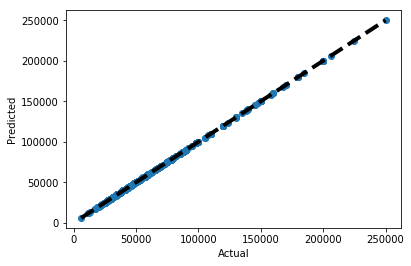

In [45]:
fig,ax = plt.subplots()
ax.scatter(house_data['Price'], house_data['predicted_price'])
ax.plot([house_data['Price'].min(), house_data['Price'].max()], [house_data['predicted_price'].min(), house_data['predicted_price'].max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()